## Oumaima bakir

# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [12]:

# Your code here for Data Loading and Cleaning
import zipfile

zip_file_path = 'C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Dataset.zip'
extract_path = 'C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot  as plt
import os
import cv2

In [4]:
path='C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray'
pd.DataFrame(os.listdir(path),columns=['Files'])

,Files
0,chest_xray
1,test
2,train
3,val


In [5]:
#The Image Count In Folders
from tqdm import tqdm
dict_={'train':[]}
for i in tqdm(['train']):
    path_=os.path.join(path,i)
    for j in os.listdir(path_):
        dict_[i].append(len(os.listdir(os.path.join(path_,j))))
pd.DataFrame(dict_,index=os.listdir(path_))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.66it/s]


,train
NORMAL,1341
PNEUMONIA,3875


In [6]:
#Size
def Size(folder):
    size=[]
    path_=os.path.join(path,folder)
    for i in tqdm(os.listdir(path_)):
        path2=os.path.join(path_,i)
        for j in os.listdir(path2):
            img=cv2.imread(os.path.join(path2,j))
            size.append(img.shape)
    return pd.Series(size)

In [3]:
path_train_NORMAL=glob.glob("C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL/*.jpeg")
path_train_PNEUMONIA=glob.glob("C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/PNEUMONIA/*.jpeg")

In [4]:
for i in path_train_NORMAL:
    print(i)

C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0115-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0117-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0119-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0122-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0125-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0127-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0128-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0129-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0131-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-0133-0001.jpeg
C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/train/NORMAL\IM-013

In [9]:
def read_images(path):
    
    train_classe = []

    target_size = (224, 224)

    for image in path:
        img = cv2.imread(image)
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
        # Resize the image to the target size
        resized_img = cv2.resize(rgb, target_size)
    
        train_classe.append(resized_img)

     # Convert the list of resized images to a NumPy array
    train_classe = np.array(train_classe)
    train_classe_normalize=train_classe.astype('float32')/255
    return(train_classe_normalize)
    

In [10]:
def vizualize_images(data):
    
    plt.figure(figsize= (20,10))

    for i in range(6):
        ax = plt.subplot(1, 6, i+1 )
        plt.imshow(data[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    

# TRAIN DATA

In [11]:
train_normal=read_images(path_train_NORMAL)

In [12]:
train_normal

array([[[[0.09411765, 0.09411765, 0.09411765],
         [0.07843138, 0.07843138, 0.07843138],
         [0.07450981, 0.07450981, 0.07450981],
         ...,
         [0.37254903, 0.37254903, 0.37254903],
         [0.36862746, 0.36862746, 0.36862746],
         [0.37254903, 0.37254903, 0.37254903]],

        [[0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.35686275, 0.35686275, 0.35686275],
         [0.37254903, 0.37254903, 0.37254903],
         [0.37254903, 0.37254903, 0.37254903]],

        [[0.09411765, 0.09411765, 0.09411765],
         [0.08235294, 0.08235294, 0.08235294],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.36078432, 0.36078432, 0.36078432]],

        ...,

        [[0.11372549, 0.11372549, 0.11372549],
         [0.11372549, 0.11372549, 0.11372549]

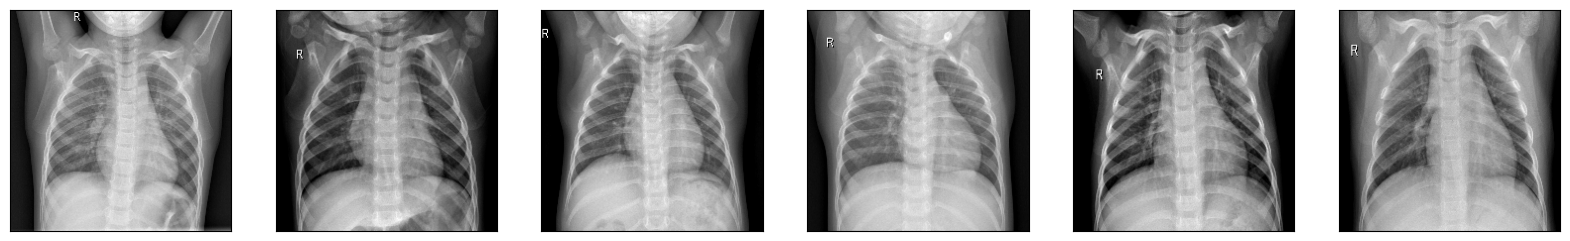

In [13]:
vizualize_images(train_normal)

In [14]:
train_PNEUMONIA=read_images(path_train_PNEUMONIA)

In [15]:
train_PNEUMONIA


array([[[[0.07058824, 0.07058824, 0.07058824],
         [0.08235294, 0.08235294, 0.08235294],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.01176471, 0.01176471, 0.01176471],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.07450981, 0.07450981, 0.07450981],
         [0.09411765, 0.09411765, 0.09411765],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.01960784, 0.01960784, 0.01960784],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.08627451, 0.08627451, 0.08627451],
         [0.09411765, 0.09411765, 0.09411765],
         [0.09803922, 0.09803922, 0.09803922],
         ...,
         [0.03921569, 0.03921569, 0.03921569],
         [0.02352941, 0.02352941, 0.02352941],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.03921569, 0.03921569, 0.03921569],
         [0.03921569, 0.03921569, 0.03921569]

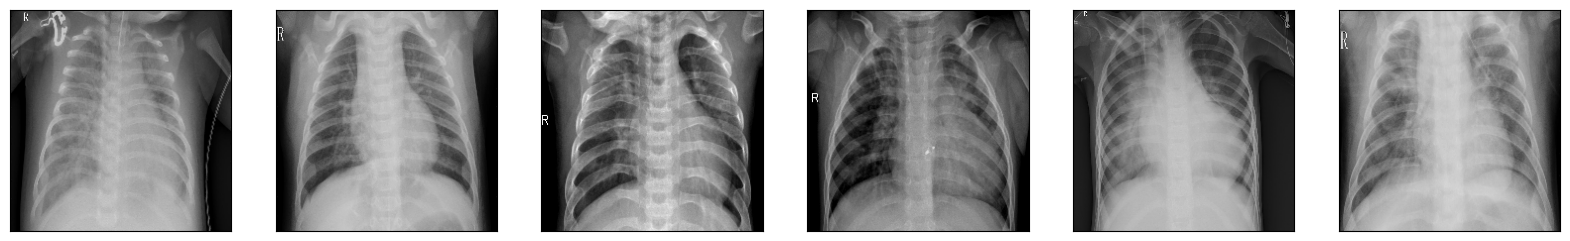

In [16]:
vizualize_images(train_PNEUMONIA)

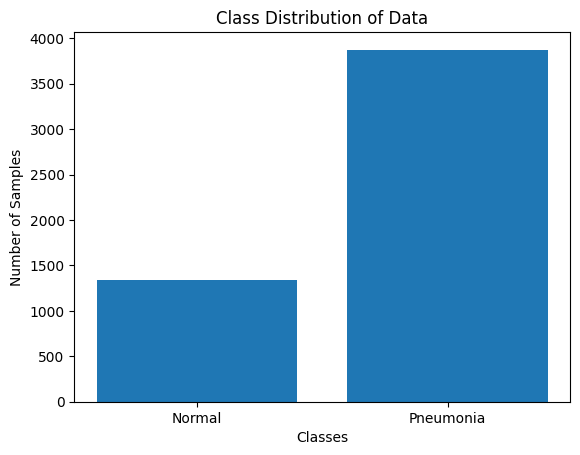

In [71]:
import matplotlib.pyplot as plt

# Assuming you have two classes: 'normal' and 'pneumonia'
class_labels = ['Normal', 'Pneumonia']

# Number of samples for each class
class_counts = [len(train_normal), len(train_PNEUMONIA)]

# Create a bar plot
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution of Data')
plt.show()

In [17]:
def plot_bytes_distrubation(image_sizes):
    plt.hist(image_sizes, bins=20, color='red', alpha=0.7)
    plt.xlabel('Image Size (Bytes)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Sizes (Bytes)')

In [18]:
train_data = [path_train_NORMAL , path_train_PNEUMONIA ]

In [19]:
import PIL
from PIL import Image

train_widths = []
train_hieghts = []
train_Imgsize = []

for path in train_data:
    image_files = list(path)

    widths = []
    heights = []
    image_sizes = []
    
    for image_file in image_files:
        size_bytes = os.path.getsize(image_file)
        image_sizes.append(size_bytes)
        with Image.open(image_file) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            

    train_widths.append(widths)
    train_hieghts.append(heights)
    train_Imgsize.append(image_sizes)

In [20]:
def plot_distribation_width_height(widths , heights ):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Widths')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Heights')

    plt.tight_layout()
    plt.show()

## widths and heights distribution

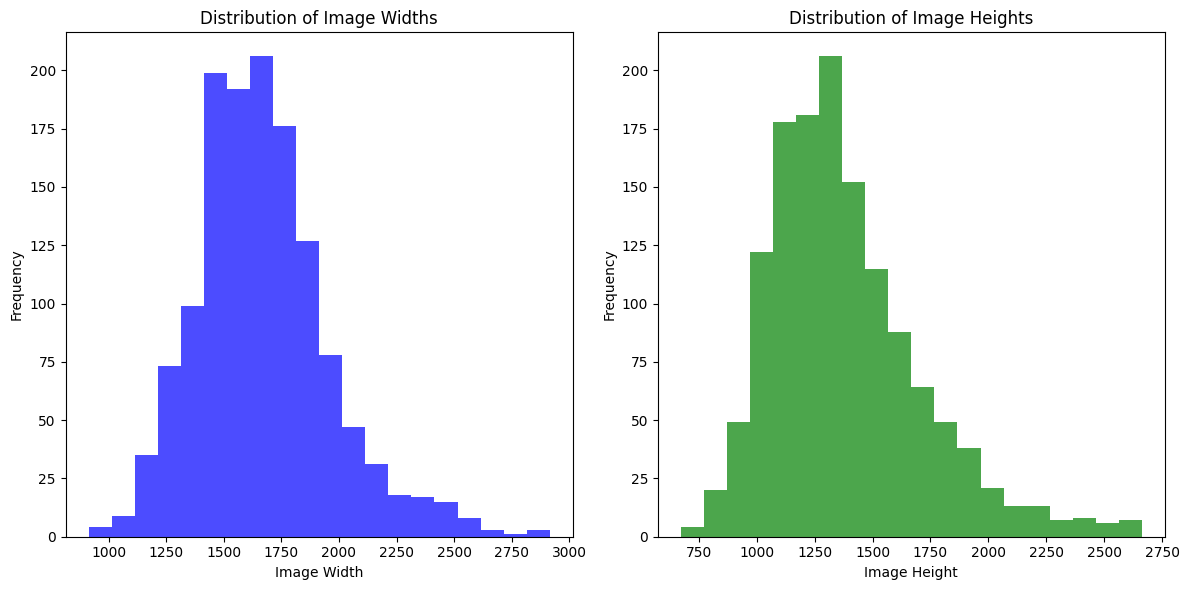

In [21]:
plot_distribation_width_height(train_widths[0] , train_hieghts[0], )

# TEST DATA

In [23]:
path_test_NORMAL=glob.glob("C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/test/NORMAL/*.jpeg")
path_test_PNEUMONIA=glob.glob("C:/Users/oumi_/Desktop/M2_SID/Methodology_DS/Data/chest_xray/test/PNEUMONIA/*.jpeg")

In [24]:
test_normal=read_images(path_test_NORMAL)

In [25]:
test_pneumonia=read_images(path_test_PNEUMONIA)

In [26]:
num_normal_test_images = len(test_normal)
num_pneumonia_test_images = len(test_pneumonia)

# Create label arrays for "normal" and "pneumonia" images
labels_normal_test = np.zeros(num_normal_test_images, dtype=int)  
labels_pneumonia_test = np.ones(num_pneumonia_test_images, dtype=int)  

# Combine the labeled data into a single dataset (if needed)
labeled_images_test = np.concatenate((test_normal, test_pneumonia), axis=0)
labels_test = np.concatenate((labels_normal_test, labels_pneumonia_test), axis=0)

## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


In [ ]:

# Your code here for Class Imbalance


## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.models
from tensorflow.keras import layers
import keras
import tensorflow as tf


In [28]:
num_normal_images = len(train_normal)
num_pneumonia_images = len(train_PNEUMONIA)

# Création des labels
labels_normal = np.zeros(num_normal_images, dtype=int)  
labels_pneumonia = np.ones(num_pneumonia_images, dtype=int)  

# concatenation 
labeled_images = np.concatenate((train_normal, train_PNEUMONIA), axis=0)
labels = np.concatenate((labels_normal, labels_pneumonia), axis=0)

In [32]:
from sklearn.model_selection import train_test_split

# Spliting the data into 80% traing  and  20% validation
labeled_images_train, labeled_images_val, labels_train, labels_val = train_test_split(
    labeled_images, labels, test_size=0.2, random_state=42)

In [44]:

# Define the input layer
input_img = keras.Input(shape=(224, 224,3))

# Convolutional layers
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Flatten et fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(units=128, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Output layer 
output = layers.Dense(units=1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=input_img, outputs=output)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 112, 112, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 4)       292       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 56, 56, 4)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 2)         74  

In [34]:
history=model.fit(labeled_images_train,labels_train,validation_data=(labeled_images_val, labels_val),epochs=17,batch_size=28)

Epoch 1/17
149/149 [==============================] - 105s 680ms/step - loss: 0.3288 - accuracy: 0.8483 - val_loss: 0.1736 - val_accuracy: 0.9349
Epoch 2/17
149/149 [==============================] - 75s 503ms/step - loss: 0.1727 - accuracy: 0.9338 - val_loss: 0.1339 - val_accuracy: 0.9521
Epoch 3/17
149/149 [==============================] - 74s 500ms/step - loss: 0.1285 - accuracy: 0.9554 - val_loss: 0.1150 - val_accuracy: 0.9540
Epoch 4/17
149/149 [==============================] - 73s 487ms/step - loss: 0.1093 - accuracy: 0.9638 - val_loss: 0.1230 - val_accuracy: 0.9511
Epoch 5/17
149/149 [==============================] - 72s 486ms/step - loss: 0.0891 - accuracy: 0.9655 - val_loss: 0.1051 - val_accuracy: 0.9617
Epoch 6/17
149/149 [==============================] - 73s 490ms/step - loss: 0.0858 - accuracy: 0.9700 - val_loss: 0.0901 - val_accuracy: 0.9598
Epoch 7/17
149/149 [==============================] - 73s 490ms/step - loss: 0.0786 - accuracy: 0.9700 - val_loss: 0.0867 - val_a

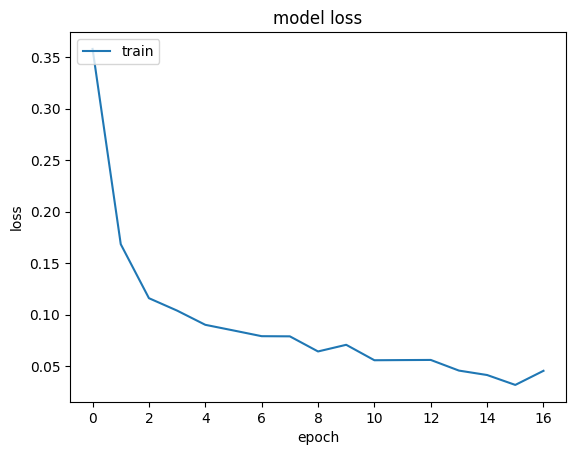

In [52]:
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Evaluation

In [28]:
from sklearn.metrics import classification_report


predictions = model.predict(labeled_images_val)
predicted_labels = (predictions ).astype(int)  


report = classification_report(labels_val, predicted_labels)


print(report)

NameError: name 'labeled_images_val' is not defined

In [55]:
from sklearn.metrics import confusion_matrix


predictions = model.predict(labeled_images_test)
predicted_labels = (predictions > 0.5).astype(int) 

conf_matrix = confusion_matrix(labels_test, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


20/20 [==============================] - 2s 86ms/step
Confusion Matrix:
[[ 88 146]
 [  6 384]]


In [56]:
from keras.models import load_model
model.save('modelll_cnn.h5')

C:\Users\oumi_\Tp1\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [59]:
# Your code here for Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_normal = ImageDataGenerator(
    rotation_range=20,           
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.2,             
    zoom_range=0.2,           
    horizontal_flip=True,      
    fill_mode='nearest'        
)


In [60]:
train_generator_normal = train_datagen_normal.flow(
    x=labeled_images_train,
    y=labels_train,
    batch_size=28,  # Specify batch size
    shuffle=True  # Shuffle the data
)

In [61]:
history_aug = model.fit(
    train_generator_normal, 
    validation_data=(labeled_images_val, labels_val),
    epochs=17,
    batch_size=28
)

Epoch 1/17
149/149 [==============================] - 174s 1s/step - loss: 0.4387 - accuracy: 0.8063 - val_loss: 0.2455 - val_accuracy: 0.8966
Epoch 2/17
149/149 [==============================] - 92s 620ms/step - loss: 0.2833 - accuracy: 0.8766 - val_loss: 0.1379 - val_accuracy: 0.9492
Epoch 3/17
149/149 [==============================] - 74s 495ms/step - loss: 0.2623 - accuracy: 0.8900 - val_loss: 0.1875 - val_accuracy: 0.9243
Epoch 4/17
149/149 [==============================] - 73s 488ms/step - loss: 0.2298 - accuracy: 0.8981 - val_loss: 0.1605 - val_accuracy: 0.9377
Epoch 5/17
149/149 [==============================] - 66s 439ms/step - loss: 0.2479 - accuracy: 0.8885 - val_loss: 0.1182 - val_accuracy: 0.9483
Epoch 6/17
149/149 [==============================] - 66s 444ms/step - loss: 0.2287 - accuracy: 0.9070 - val_loss: 0.1481 - val_accuracy: 0.9425
Epoch 7/17
149/149 [==============================] - 65s 438ms/step - loss: 0.2220 - accuracy: 0.9077 - val_loss: 0.1296 - val_accu

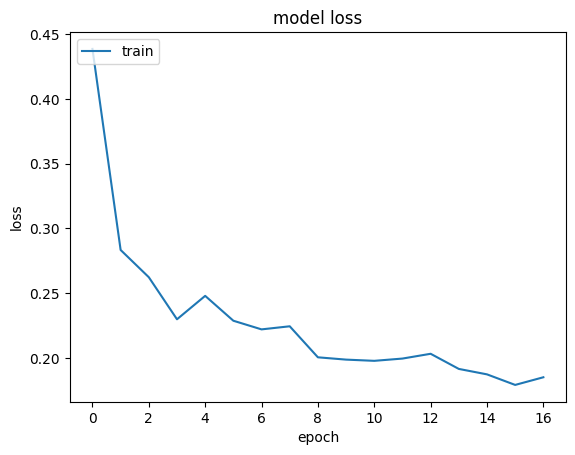

In [63]:

plt.plot(history_aug.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [64]:
# Your code here for Model Evaluation
from sklearn.metrics import classification_report


predictions = model.predict(labeled_images_val)
predicted_labels = (predictions > 0.5).astype(int)  


report = classification_report(labels_val, predicted_labels)


print(report)

33/33 [==============================] - 4s 128ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       287
           1       0.99      0.94      0.96       757

    accuracy                           0.95      1044
   macro avg       0.92      0.95      0.94      1044
weighted avg       0.95      0.95      0.95      1044



In [65]:
from sklearn.metrics import confusion_matrix


predictions = model.predict(labeled_images_test)
predicted_labels = (predictions > 0.5).astype(int) 

conf_matrix = confusion_matrix(labels_test, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

20/20 [==============================] - 2s 104ms/step
Confusion Matrix:
[[177  57]
 [ 13 377]]


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [25]:
img=cv2.imread('IM-0001-0001.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0
predictions = model.predict(np.expand_dims(img, axis=0))


1/1 [==============================] - 0s 71ms/step


array([[0.9171439]], dtype=float32)

In [26]:
predictions# Interpret the prediction
class_labels = ["Normal", "Pneumonia"]
predicted_class = class_labels[int(predictions[0][0] > 0.5)]

In [42]:
predicted_class = class_labels[np.argmax(predictions)]
predicted_class

{'predicted_class': 'Normal', 'class_probabilities': {0.9171438813209534}}

In [5]:
import cv2
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import threading

app = Flask(__name__)

# Load your trained model (replace 'model.h5' with your model file)
model = load_model('modelll_cnn.h5')

# Define a route for inference
@app.route('/predict', methods=['POST'])
def predict():
    try:

        img_file = request.files['image'].read()


        img = cv2.imdecode(np.frombuffer(img_file, np.uint8),-1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = cv2.resize(img, (224, 224))
        img = img.astype('float32') / 255

        predictions = model.predict(np.expand_dims(img, axis=0))

        result = {
            'predicted_classy': 'cc' if predictions[0][0] >= 0.5 else 'dd',
            'class_probability': float(predictions[0][0])
        }

        return jsonify(result)
    except Exception as e:
        return str(e), 400

if __name__ == '__main__':
    threading.Thread(target=lambda: app.run(debug=False)).start()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [1]:
import cv2
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import threading

app = Flask(__name__)


model = load_model('modelll_cnn.h5')

# Define a route for inference
@app.route('/predict', methods=['POST'])
def predict():
    try:
        img_file = request.files['image'].read()

        img = cv2.imdecode(np.frombuffer(img_file, np.uint8), cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32') / 255

        predictions = model.predict(np.expand_dims(img, axis=0))
        

        result = {
            'predicted_class': 'Pneumonia' if predictions[0][0] >= 0.5 else 'Normal',
            'class_probability': float(predictions[0][0])
        }

        return jsonify(result)
    except Exception as e:
        return str(e), 400

if __name__ == '__main__':
    threading.Thread(target=lambda: app.run(debug=False)).start()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [3]:
import requests

api_url = 'http://127.0.0.1:5000/predict'


image_path = 'person1_virus_6_pneumonia.jpeg'
files = {'image': (image_path, open(image_path, 'rb'))}


response = requests.post(api_url, files=files)

print(response.content)

1/1 [==============================] - 0s 26ms/step


127.0.0.1 - - [10/Oct/2023 20:36:47] "POST /predict HTTP/1.1" 200 -


b'{"class_probability":0.9999999403953552,"predicted_class":"Pneumonia"}\n'


In [4]:
img=cv2.imread('person1_virus_6_pneumonia.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255
predictions = model.predict(np.expand_dims(img, axis=0))
predictions[0]


1/1 [==============================] - 0s 25ms/step


array([0.99999994], dtype=float32)


### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


